## ECS 171 Homework 1

Please explain your solutions clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. Please put your work/solution for each question after the corresponding horizontal line in a separate coding or markdown box. Feel free to add coding or markdown boxes as you see fit. Usage of the numpy, pandas, seaborn, matplotlib and sklearn libraries are allowed.

For this assignmennt I suggest sticking with these libraries so we can more easily streamline the learning process and advice we give as TAs. If the professor says otherwise then feel free to follow her instructions.

### Question 1 - (5 points)
How does the presence of outliers influence the choice between using covariance and correlation to analyze the relationship between two variables in a dataset? Explain how each measure handles outliers differently and discuss the implications for interpreting their results in practical applications.
***

<font color='cyan'>
<h4> Q1 Answer </h4>

<li> When outliers occure, the covariance value may be really high or low depands on the dataset which suggesting a stronger or weaker realtion than the actually data. 
<li> Correlation standardizes the covariance by the product of the standard deviations of the variables, it is less sensitive than covariance but outliners can still distort the correlation coefficient. 
<li> For choosing between these two, if the dataset contains significant outliers, correlation can provide more informative. 
</font>


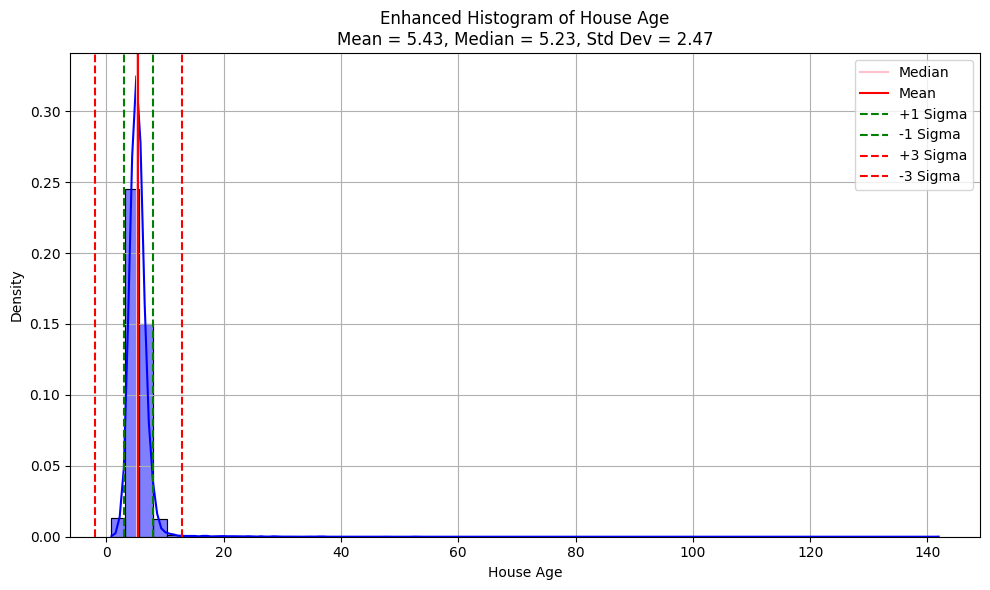

Covariance between House Age and House Price: 0.43382563716567785
Correlation between House Age and House Price: 0.15194828974145783


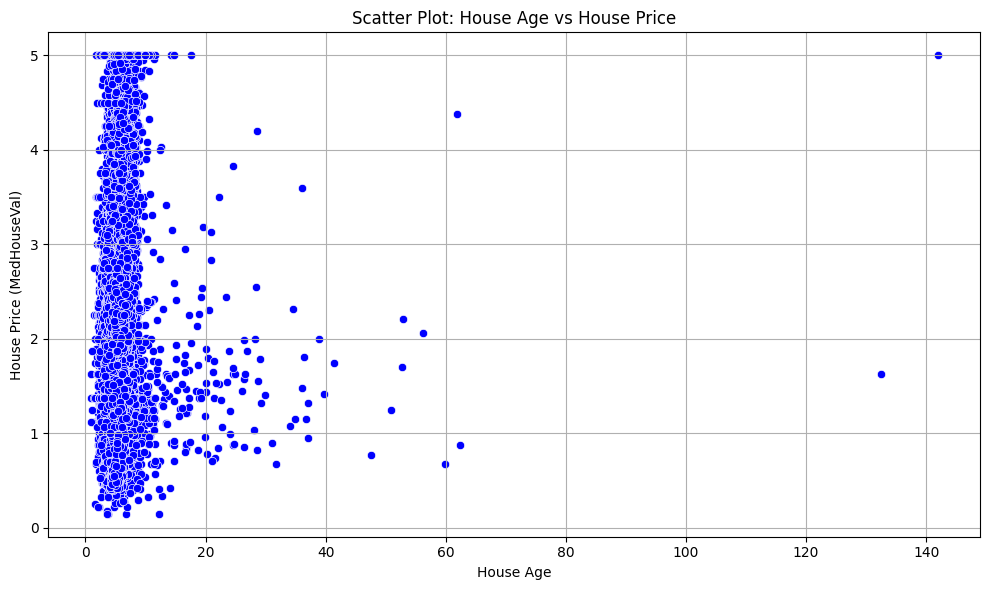

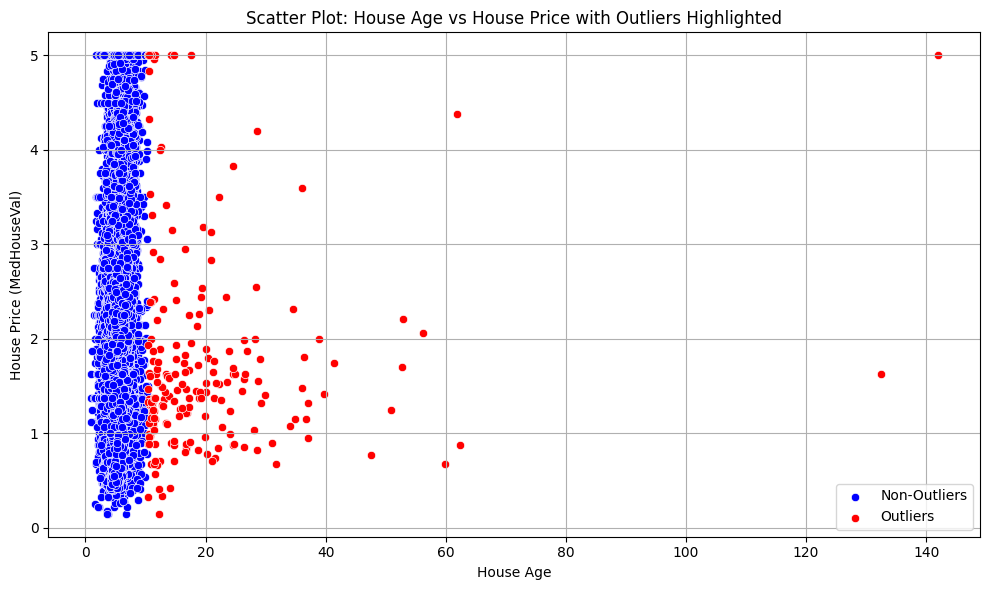

Covariance (after removing outliers): 0.4692855316053294
Correlation (after removing outliers): 0.32849360112313836


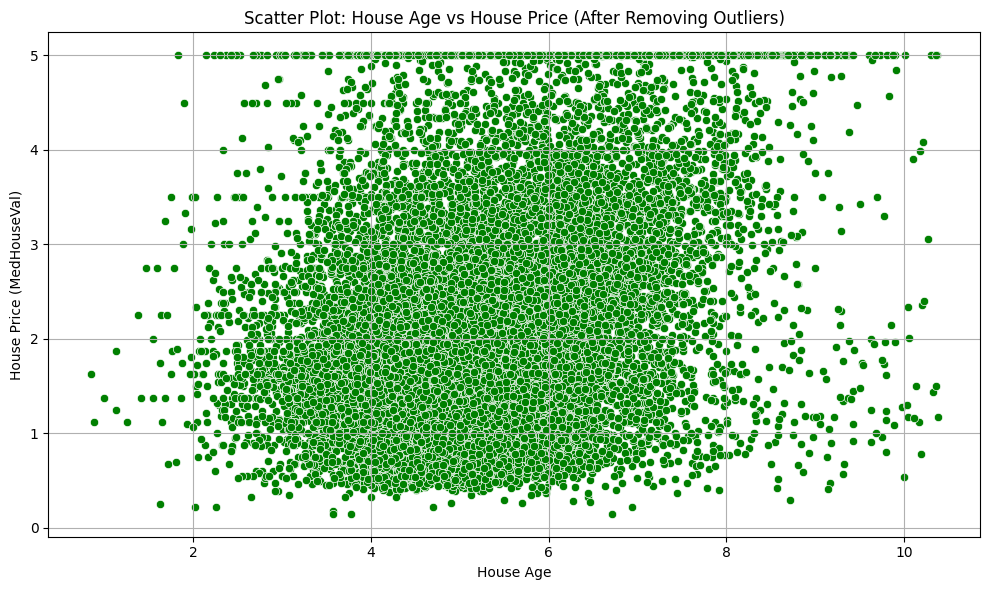

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

housing = fetch_california_housing()

# Extract House Age and House Price
x = housing.data[:, [2]]  # House Age
y = housing.target         # House Price 

df = pd.DataFrame(np.c_[x, y], columns=['HouseAge', 'MedHouseVal'])

# Basic statistics before outlier removal
std_dev_age = df['HouseAge'].std()
median_age = df['HouseAge'].median()
mean_age = df['HouseAge'].mean()

covariance = np.cov(df['HouseAge'], df['MedHouseVal'])[0, 1]
correlation = np.corrcoef(df['HouseAge'], df['MedHouseVal'])[0, 1]


plt.figure(figsize=(10, 6))
sns.histplot(df['HouseAge'], bins=60, kde=True, color='blue', stat='density')
plt.axvline(x=median_age, color='pink', label='Median')
plt.axvline(x=mean_age, color='red', label='Mean')
plt.axvline(x=mean_age + std_dev_age, color='green', linestyle='--', label='+1 Sigma')
plt.axvline(x=mean_age - std_dev_age, color='green', linestyle='--', label='-1 Sigma')
plt.axvline(x=mean_age + 3 * std_dev_age, color='red', linestyle='--', label='+3 Sigma')
plt.axvline(x=mean_age - 3 * std_dev_age, color='red', linestyle='--', label='-3 Sigma')
plt.title(f'Enhanced Histogram of House Age\nMean = {mean_age :.2f}, Median = {median_age:.2f}, Std Dev = {std_dev_age:.2f}')
plt.xlabel('House Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Covariance between House Age and House Price: {covariance}")
print(f"Correlation between House Age and House Price: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='HouseAge', y='MedHouseVal', data=df, color='blue')
plt.title('Scatter Plot: House Age vs House Price')
plt.xlabel('House Age')
plt.ylabel('House Price (MedHouseVal)')
plt.grid(True)
plt.tight_layout()
plt.show()



lower_bound_age = mean_age - 2 * std_dev_age
upper_bound_age = mean_age + 2 * std_dev_age

df_non_outliers = df[(df['HouseAge'] >= lower_bound_age) & (df['HouseAge'] <= upper_bound_age)]
df_outliers = df[(df['HouseAge'] < lower_bound_age) | (df['HouseAge'] > upper_bound_age)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='HouseAge', y='MedHouseVal', data=df_non_outliers, color='blue', label='Non-Outliers')
sns.scatterplot(x='HouseAge', y='MedHouseVal', data=df_outliers, color='red', label='Outliers')
plt.title('Scatter Plot: House Age vs House Price with Outliers Highlighted')
plt.xlabel('House Age')
plt.ylabel('House Price (MedHouseVal)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Filter the DataFrame to remove outliers
df_filtered = df[(df['HouseAge'] >= lower_bound_age) & (df['HouseAge'] <= upper_bound_age)]

# Basic statistics after outlier removal
std_dev_age_filtered = df_filtered['HouseAge'].std()
mean_age_filtered = df_filtered['HouseAge'].mean()

covariance_filtered = np.cov(df_filtered['HouseAge'], df_filtered['MedHouseVal'])[0, 1]
correlation_filtered = np.corrcoef(df_filtered['HouseAge'], df_filtered['MedHouseVal'])[0, 1]

print(f"Covariance (after removing outliers): {covariance_filtered}")
print(f"Correlation (after removing outliers): {correlation_filtered}")

# Plotting scatter plot after removing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HouseAge', y='MedHouseVal', data=df_filtered, color='green')
plt.title('Scatter Plot: House Age vs House Price (After Removing Outliers)')
plt.xlabel('House Age')
plt.ylabel('House Price (MedHouseVal)')
plt.grid(True)
plt.tight_layout()
plt.show()


<font color = 'cyan'>
<li> With the california housing dataset, the correlation can provide the info that how house age relate to house price and when the correlation is too low, we know there are a lot of 'large' outliners, and the correlation double after dropping the outliners. 
</font>

***

Here you can how outliers effect covariance and correlation when they are applied to a dataset. This should pretty much follow the lecture material.

You can look into how having different levels of covariance/correlation could have different implications.

When discussing practical application this mainly refers to how these measures could effect more real-world data. In this section feel free to also use some sort of real-world example if you need to in order to help your explanation.

### Question 2 - (25 points)
The following code provides the distribution of the attributes of the breast cancer dataset from sklearn library. 


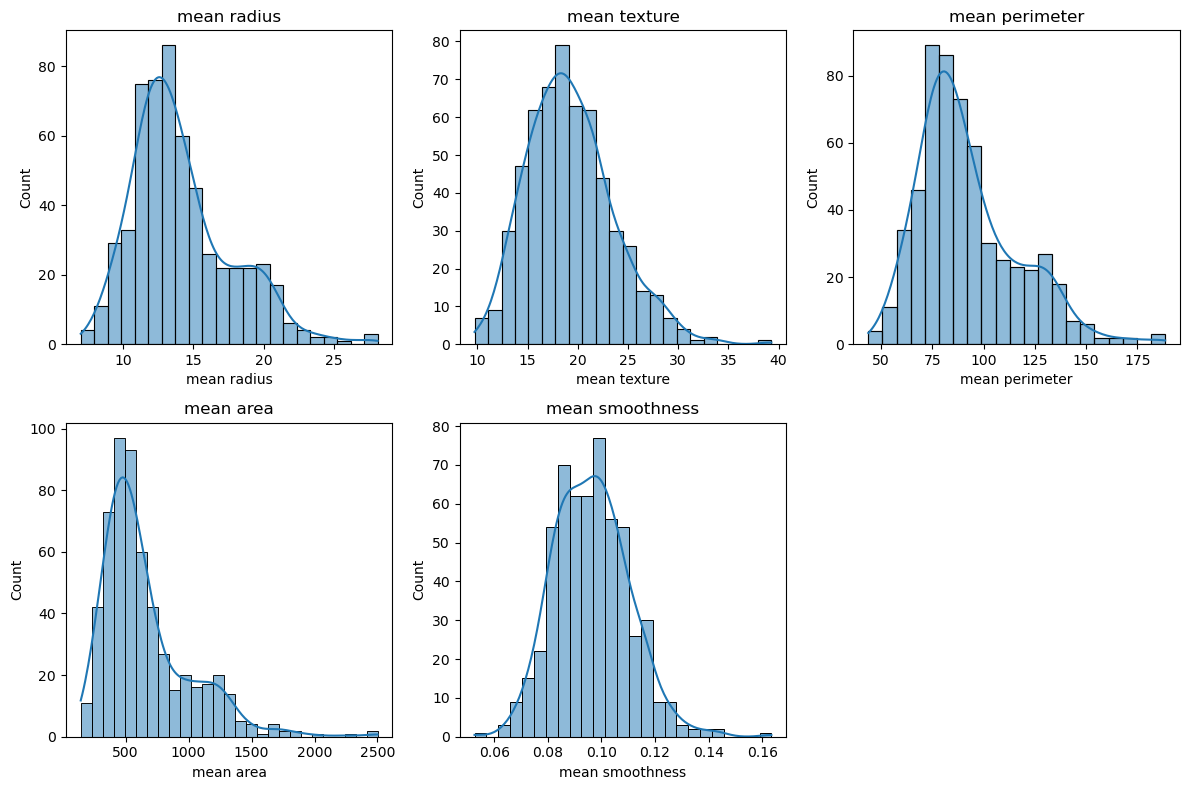


mean:
mean radius         14.127292
mean texture        19.289649
mean perimeter      91.969033
mean area          654.889104
mean smoothness      0.096360
dtype: float64 , 
median:
mean radius         13.37000
mean texture        18.84000
mean perimeter      86.24000
mean area          551.10000
mean smoothness      0.09587
dtype: float64 , 
std:
 mean radius          3.524049
mean texture         4.301036
mean perimeter      24.298981
mean area          351.914129
mean smoothness      0.014064
dtype: float64


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Plot histograms for some of the features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

#### Question 2.1 - (10 points)
Analyze each plot and explain your observations regarding these attributes in terms of data skewness (for instance, is the data symmetric, if not is it right/left skewed? Why and how do you identify the skewness by using the parameters of the distributions such as mean, median, standard deviation?) Provide a complete analysis and incude any supporting explanation/computation if relevant.
***

Here you just need to explain how the statistics could indicate a certain skewedness and describe the skew that the data has.

<font color = 'cyan'>
<h4>2.1 Answer</h4>
<li> For distributions Mean Raius, Mean Texture, Mean Perimeter, Mean Area: they all have the feature that the mean is greater than the median, suggesting all the distributions are right-skewed. Moreover, There is a noticeable gap between the mean and median in Mean Area graph, with the mean being much larger than the median, indicating a strong right skew; and for Mean Texture,  the mean is slightly greater than the median, which suggests a slight right skew.
<li> For Mean Smoothness, the mean is almost equal to the median, so it is symmetic or at least close to symmetic.  
</font>

#### Question 2.2 - (5 points)
Explain and compare the parameters and output of Z-score and Min-Max data transformation techniques. 
***

<font color = 'cyan'>
<h4>2.1 Answer</h4>
</font>

In [14]:
mean_values = df[features_to_plot].mean()
median_values = df[features_to_plot].median()
std_values = df[features_to_plot].std()

z_scores = (df[features_to_plot] - df[features_to_plot].mean()) / df[features_to_plot].std()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()  
df_scaled[features_to_plot] = scaler.fit_transform(df[features_to_plot])

pd.set_option('display.float_format', lambda x: '%.3f' % x) 

print("Z-Scores (first 5 rows):\n", z_scores.head(), "\n")
print("Min-Max Scaled Data (first 5 rows):\n", df_scaled[features_to_plot].head())


Z-Scores (first 5 rows):
    mean radius  mean texture  mean perimeter  mean area  mean smoothness
0        1.096        -2.072           1.269      0.984            1.567
1        1.828        -0.353           1.684      1.907           -0.826
2        1.578         0.456           1.565      1.558            0.941
3       -0.768         0.254          -0.592     -0.764            3.281
4        1.749        -1.151           1.775      1.825            0.280 

Min-Max Scaled Data (first 5 rows):
    mean radius  mean texture  mean perimeter  mean area  mean smoothness
0        0.521         0.023           0.546      0.364            0.594
1        0.643         0.273           0.616      0.502            0.290
2        0.601         0.390           0.596      0.449            0.514
3        0.210         0.361           0.234      0.103            0.811
4        0.630         0.157           0.631      0.489            0.430


<font color = 'cyan'>
<li> For z-score, it indicates show how far each specific value is from the mean in terms of standard deviations. For example, for first data point in "mean radius," the Z-score is approximately 1.096, which means the data is 1.096 standard deviations above the mean "mean radius."
<li> For max-min, all values are scaled to [0, 1], if the score is closer to 1, it means it is close to the maximun value; if the score is closer to 0, it means the value is close to the minimun value. For example, in mean Smoothness, the min-max value is 0.594 for the first tumor indicates it has a smoothness value around 59.4% between the minimum and maximum smoothness values in the dataset.
<li> For Z-score, it is useful for comparing the data in terms of standard deviations from the mean; in other hand, min-max is use to rescales the data to a specific range for normalization. 
<br>

***
</font>



Here you should give a brief explanation of the inputs and outputs for the above preprocessing techniques. - doesn't necessarily need coding but can have to show example

#### Question 2.3 - (5 points)
Apply the Z-score normalization technique on the dataset. You can either develop the normalization function from scratch, or use sklearn.preprocessing to make function calls to perform the transformation. After data normalization, visualize the normalized attributes (note: don't normalize the output variable - apply normalization on these attributes: 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'). Compare the data before and after normalization. What changes you see in the data? 
***

<font color = 'cyan'>
<h4>2.3 Answer</h4>
</font>

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_min_max = df.copy()  
df_sd = df.copy()
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

df_min_max[features_to_plot] = min_max_scaler.fit_transform(df[features_to_plot])
df_sd[features_to_plot] = standard_scaler.fit_transform(df[features_to_plot])

print("Min-Max Scaled Data:\n", df_min_max[features_to_plot], "\n")
print("Z-Scores:\n", df_sd[features_to_plot])


Min-Max Scaled Data:
      mean radius  mean texture  mean perimeter  mean area  mean smoothness
0          0.521         0.023           0.546      0.364            0.594
1          0.643         0.273           0.616      0.502            0.290
2          0.601         0.390           0.596      0.449            0.514
3          0.210         0.361           0.234      0.103            0.811
4          0.630         0.157           0.631      0.489            0.430
..           ...           ...             ...        ...              ...
564        0.690         0.429           0.679      0.566            0.527
565        0.622         0.627           0.604      0.474            0.408
566        0.455         0.621           0.446      0.303            0.288
567        0.645         0.664           0.666      0.476            0.588
568        0.037         0.502           0.029      0.016            0.000

[569 rows x 5 columns] 

Z-Scores:
      mean radius  mean texture  mean peri

<font color = 'cyan'>
<li> The values are all scale to between [0, 1] for min-max, and for Z-Scores, the scores are how many standard devations away of the data value from the mean, so it can be both possitive and negative but they are more smaller than the orginal values. 

***
</font>

Feel free to check page 119 from the textbook and sklearn documentation (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

From stratch: z = (x - μ) / σ

You can use the 2.1 code as a baseline and change the dataframe so it fits using the standardscaler or just update the df manually.
Either way this should not require much change from 2.1 code

#### Question 2.4 - (5 points)
Find the outliers in the data (for the identified attributes) if any, by computing the interquartile ranges for Q1, Q2, Q3, IQR, min and max. Also visualize the outliers if any. 
***

You can reference discussion 1 here. Boxplots are a good way to visualize outliers. Here the outputs don't need to be exact but they should be quite close to our expected values.

### Question 3 - (30 points)
For this question, use the [California House Prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from sklearn. The goal is to develop a linear regression model to predict the target variable (MedHouseVal) which represents the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). Note that the precision of changes to look for in this dataset may be relatively small so keep an eye out for smaller changes in the difference between models - in the range of around 2 percent or more between models.

Note that we had originally used the Boston Housing Prices dataset that is featured in the textbook here. This dataset has ethical issues so we switched to the California Housing Dataset. This is why we included this warning to keep out for "smaller" changes. However, from lab I did notice that this dataset has some issues because it requires a newer version of scikit learn - 

For mac - '/Applications/Python\ 3.11/Install\ Certificates.command'

If you are still having issues with this, TA's can help

#### Question 3.1 - (10 points)
Split your data into train and test sets by [80:20] rate (80\% for training and 20\% for testing). Initialize a LinearRegression model using the LinearRegression algorithm in sklearn. Evaluate the performance of the model on the test data by reporting MSE and R2 values (you can call the existing functions in sklearn to report MSE and R2, or you can develop these techniques from scratch). Visualize the relationship between y and y_hat in test data (see the example plot covered during lec3-slide# 7).
***

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
housing = fetch_california_housing()

Here you can reference the lab 1 recording posted in modules for some examples on how you might split the training/test sets. You won't need to look at polynomial features but may find sklearn's mse and r2 functions useful.

You can split the data into the feature/target using .data and .target -> see documentation

sklearn documentation for LinearRegression -> OSL
.fit() takes in the training data
.predict() predicts the target

For the visualization you want to have a scatter plot with all the predicted vs actual values and a plot of a line through the target test minimum to maximum values 

reported mse values dont need to be 'exactly' accurate but should be close to the expected values (maybe a few hundredths away)

#### Question 3.2 - (10 points)
Repeat 3.1 using the normalized features to train your model (use z-score). Compare your findings from 3.1 and 3.2 and report any observations. 
***

Similar to 2.3

#### Question 3.3 - (10 points)
Implement cross validation method (from scratch), and apply 12-fold cross validation on your model to enhance the fit of your model. Report the mean of the R2 and MSE scores as the mse and R2 of the best model. Print the coefficients (i.e., weights) of the best model and explain what do you consider to be the best model. 
***

Should be similar to the lab - except you won't need to go through each polynomial degree and you will be using the normalized X values and you need to manually generate the k-folds yourself instead of using the in-built function. This means you will want to have k iterations and for each iteration of k you will use a separate fold - meaning you will basically rotate the fold you use as your testing set and the rest should be the training set.

Note that we are trying to reduce or minimize loss so keep this in mind when choosing the "best model".

I want to point out here that this is not how you would normally use cross-validation - which traditionally used by taking the average metric of loss across all folds in order to provide robust estimate of the model's generalization performance on unseen data. - The approach we are looking may lead to overfitting on a certain fold.

However, in some cases, you might have specific requirements or domain knowledge that justify looking for a model based on its performance on a particular fold or set of folds so I assume this is the purpose of this assignment - as well as to increase familiarity with the process.

### Question 4 - (20 points)
Answer the following questions:

#### Question 4.1 - (3 points)
What is the difference between Gradient Descent and Ordinary Lease Squares method? Explain the advantages and disadvantages of each approach.
***

As discussed in lecture

#### Question 4.2 - (2 points)
How does a negative or positive gradient indicate the direction towards achieving a sub-optimal or optimal weight? Explain your answer.
***

As discussed in lecture (consider a bowl w/lowest point being an optima)

#### Question 4.3 - (10 points)
Provide the complete math for updating Wj associated with the jth attribute of a dataset using Gradient Descent weight update rule for finding the coefficients of a linear regression model. Use the Sum of Squared Residuals (SSR) as the loss (or cost) function to compute the gradient (i.e., weight change). Provide all the necessary details explaining the parameters used in your work.
***

As discussed in lecture (@ end of 4/10 vod and gradient descent slide - the vod does cut out before she goes over this entirely)

The general idea is that you will need to expand the SSR formula then apply the chain rule.

Remember -- New Weight = Old Weight - Learning Rate * Gradient

Gradient is the derivative of SSR w.r.t corresponding weight
Make sure to explain all the parameters, the idea is that you should understand how this works and what the input/output is. For example what corresponds to target value, weight, etc.

#### Question 4.4 - (5 points)
Explain the strategy in and the difference between stochastic gradient descent and batch-gradient descent algorithmically. 
***

I think this will be discussed in lecture - you will need to consider what training data is used to calculate the gradient

### Question 5 - (20 points)
Use California House Prices dataset for this question. 

#### Question 5.1 - (15 points)
Use stochastic gradient descent approach to train a linear regression model using all the features of the dataset. After each epoch of training, record the MSE and R2 scores of the linear regression model on training data and test data. Run your solution for 100 epochs. Plot the recorded MSE-train[], MSE-test in one figure, and R2-train[], R2-test in another figure (over 100 epochs). 
***

In [ ]:
from sklearn.linear_model import SGDRegressor

You will want to store all the relevant metrics accross epochs to plot

This is out of scope for the question/hw - although we are focusing on using sklearn for this assignment (Stick to using sklearn here as it is a easy tool for beginners) - ml work can also be implemented with many different libraries with pretty similar implementations. For example, pytorch would have a quite similar setup but with a different approach to training and making predictions with the model - it would separate this section into a forward (predictions) and backwards pass (gradients) which sklearn does internally so you only really need to one call to fit() or partial_fit().
This is not necessary here as we are just doing linear regression.

You will likely want to use SGDRegressor's partial_fit for this assignment - call partial_fit for each datapoint.

#### Question 5.2 - (5 points)
Annotate your code. Explain the details of your understanding of the code below the code or in the following markdown cell.
***

Focus your explanation on "significant" areas of code that are different than the general pipeline used in the above questions - although you can comment and explain your understanding of these areas as well. You can refer to documentation, make sure to cite if you do.